In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
df = pd.read_csv('Documents/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df1 = df.drop(['CustomerID'],axis=1)
df1

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le_Genre = LabelEncoder()


In [10]:
df1['Genre_n'] = le_Genre.fit_transform(df1['Genre'])

In [11]:
df1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_n
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [12]:
df2 = df1.drop(['Genre'],axis=1)
df2

,Age,Annual Income (k$),Spending Score (1-100),Genre_n
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


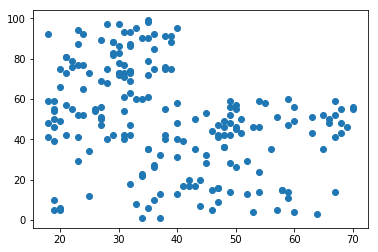

In [13]:
plt.scatter(df2['Age'],df2['Spending Score (1-100)'])

In [14]:
km = KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
y_predicted = km.fit_predict(df[['Age','Spending Score (1-100)']])
y_predicted 

array([1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 1,
       2, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 0, 1, 0, 3, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [16]:
df2['cluster'] = y_predicted
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_n,cluster
0,19,15,39,1,1
1,21,15,81,1,0
2,20,16,6,0,2
3,23,16,77,0,0
4,31,17,40,0,1


In [17]:
km.cluster_centers_

array([[30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667]])

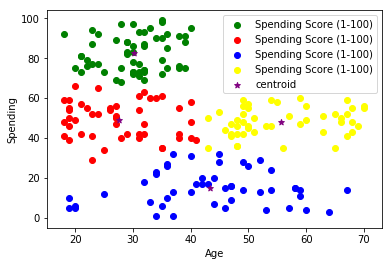

In [18]:
df3 = df2[df2.cluster==0]
df4 = df2[df2.cluster==1]
df5 = df2[df2.cluster==2]
df6 = df2[df2.cluster==3]
plt.scatter(df3.Age,df3['Spending Score (1-100)'],color='green')
plt.scatter(df4.Age,df4['Spending Score (1-100)'],color='red')
plt.scatter(df5.Age,df5['Spending Score (1-100)'],color='blue')
plt.scatter(df6.Age,df6['Spending Score (1-100)'],color='yellow')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Spending')
plt.legend()


In [19]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Spending Score (1-100)']])
    sse.append(km.inertia_)

In [20]:
sse

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23830.033602505428,
 19483.1179104427,
 15514.19313435103,
 13020.084512948222,
 11439.26142841354]

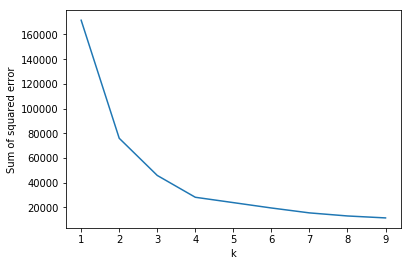

In [21]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)